<a href="https://colab.research.google.com/github/RScicomp/A3_ComputerVision/blob/master/Alex_convolutional_neural_netwark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
#  and normalize it with range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


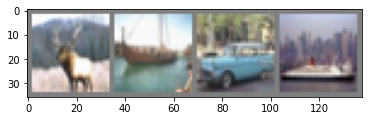

 deer  ship   car  ship


In [3]:
# show some training images
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network that take 3-channel images data
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 input image channel, 6 output channels, 5x5 square convolution
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling over a (2, 2) window
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input image channel, 16 output channels, 5x5 square convolution
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #Define pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5) # 5*5 from image dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
NUM_CLASSES = 10
class AlexNet(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 2 * 2, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 2 * 2)
        x = self.classifier(x)
        return x


net = AlexNet()

In [0]:
import torch.optim as optim

# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [0]:

def train(self):
    training_accuracy = []
    test_accuracy = []

    print("train:")
    self.model.train()
    train_loss = 0
    train_correct = 0
    total = 0

    for batch_num, (data, target) in enumerate(self.train_loader):
        data, target = data.to(self.device), target.to(self.device)
        self.optimizer.zero_grad()
        output = self.model(data)
        loss = self.criterion(output, target)
        loss.backward()
        self.optimizer.step()
        train_loss += loss.item()
        prediction = torch.max(output, 1)  # second param "1" represents the dimension to be reduced
        total += target.size(0)

        # train_correct incremented by one if predicted right
        train_correct += np.sum(prediction[1].cpu().numpy() == target.cpu().numpy())

        progress_bar(batch_num, len(self.train_loader), 'Loss: %.4f | Acc: %.3f%% (%d/%d)'
                      % (train_loss / (batch_num + 1), 100. * train_correct / total, train_correct, total))

    return train_loss, train_correct / total

In [12]:
# Train the network
training_accuracy = []
test_accuracy = []

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()

        # # print statistics
        # running_loss += loss.item()
        # if i % 2000 == 1999:    # print every 2000 mini-batches
        #     print('[%d, %5d] loss: %.3f' %
        #           (epoch + 1, i + 1, running_loss / 2000))
        #     running_loss = 0.0
     
    train_correct = 0
    train_total = 0

    # get train accuracy
    with torch.no_grad():
      for data in trainloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        # calculate the accuracy
        train_correct += (predicted == labels).sum().item()
    trainAccuracy = train_correct / train_total
    training_accuracy.append(trainAccuracy)
    print('Epoch %d train accuracy: %.3f'%(epoch+1, trainAccuracy))

    test_correct = 0
    test_total = 0
    # get test accuracy
    with torch.no_grad():
      for data in testloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        # calculate the accuracy
        test_correct += (predicted == labels).sum().item()
    testAccuracy = test_correct / test_total
    test_accuracy.append(testAccuracy)
    print('Epoch %d test accuracy: %.3f'%(epoch+1, testAccuracy))

print('Finished Training')

Epoch 1 train accuracy: 0.387
Epoch 1 test accuracy: 0.386
Epoch 2 train accuracy: 0.574
Epoch 2 test accuracy: 0.561
Epoch 3 train accuracy: 0.653
Epoch 3 test accuracy: 0.621
Epoch 4 train accuracy: 0.709
Epoch 4 test accuracy: 0.666
Epoch 5 train accuracy: 0.788
Epoch 5 test accuracy: 0.713
Epoch 6 train accuracy: 0.804
Epoch 6 test accuracy: 0.717
Epoch 7 train accuracy: 0.852
Epoch 7 test accuracy: 0.731
Epoch 8 train accuracy: 0.873
Epoch 8 test accuracy: 0.729
Epoch 9 train accuracy: 0.910
Epoch 9 test accuracy: 0.746
Epoch 10 train accuracy: 0.938
Epoch 10 test accuracy: 0.748
Finished Training


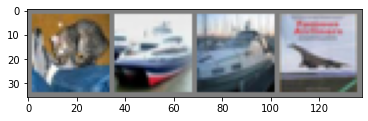

GroundTruth:    cat  ship  ship plane


In [0]:
# get data iterator
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
# get output images
outputs = net(images)

In [0]:
# get predicted image
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car plane plane


In [14]:
correct = 0
total = 0

# get accuracy for all the test images
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        # calculate the accuracy
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 74 %


In [15]:
# get accuracies of all the classes
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # get test images
        outputs = net(images)
        # get predicted images
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        # get predicted information
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

# calculate the accuracies of all the classes
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 82 %
Accuracy of   car : 86 %
Accuracy of  bird : 65 %
Accuracy of   cat : 52 %
Accuracy of  deer : 72 %
Accuracy of   dog : 66 %
Accuracy of  frog : 85 %
Accuracy of horse : 76 %
Accuracy of  ship : 84 %
Accuracy of truck : 75 %


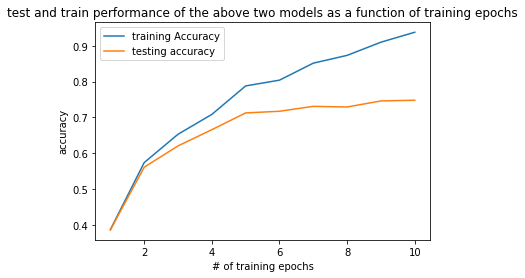

In [13]:

import matplotlib.pyplot as plt 
  
# line 1 points 
x1 = [1,2,3,4,5,6,7,8,9,10]
y1 = training_accuracy
# plotting the line 1 points  
plt.plot(x1, y1, label = "training Accuracy") 
  
# line 2 points 
x2 = [1,2,3,4,5,6,7,8,9,10]
y2 = test_accuracy
# plotting the line 2 points  
plt.plot(x2, y2, label = "testing accuracy") 
  
# naming the x axis 
plt.xlabel('# of training epochs') 
# naming the y axis 
plt.ylabel('accuracy') 
# giving a title to my graph 
plt.title('test and train performance of the above two models as a function of training epochs') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show()